In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [31]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

In [32]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [33]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [35]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [36]:
df=books.merge(ratings,on='ISBN')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [37]:
#drop ISBN(it not gonna help in recommending), [Image-URL-M, Image-URL-S](as Image-URL-L are same)
df.drop(['ISBN','Image-URL-M','Image-URL-S'],axis=1,inplace=True)

In [38]:
df

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...
1031131,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [39]:
df=df.merge(users,on='User-ID')
df.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [40]:
df.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [41]:
#we can drop year of publish as they not gonna help in recommending
df.drop(['Year-Of-Publication'],axis=1,inplace=True)

In [42]:
df['Book-Title'].nunique()

241071

## EDA

## Removing Duplicates

In [43]:
df.shape

(1031136, 8)

In [44]:
#checking for duplicates
df.duplicated().sum()

0

In [46]:
df=df.drop_duplicates()

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(1031136, 8)

## Missing value handling




In [49]:
df.isnull().sum()

Book-Title          0
Book-Author         2
Publisher           2
Image-URL-L         4
User-ID             0
Book-Rating         0
Location            0
Age            277835
dtype: int64

In [50]:
#since the null values are so less for Book-Author and Publisher, we can drop them directly
df.dropna(subset=['Book-Author'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)

In [51]:
df.isnull().sum()

Book-Title          0
Book-Author         0
Publisher           0
Image-URL-L         4
User-ID             0
Book-Rating         0
Location            0
Age            277835
dtype: int64

In [52]:
df.shape

(1031132, 8)

In [53]:
#Age column is having large number of null values, we can handle it by using Mode
df['Age'].mode()

0    33.0
Name: Age, dtype: float64

In [54]:
df['Age'].fillna(df['Age'].mode()[0],inplace=True)

In [55]:
df.isnull().sum()

Book-Title     0
Book-Author    0
Publisher      0
Image-URL-L    4
User-ID        0
Book-Rating    0
Location       0
Age            0
dtype: int64

In [56]:
df.shape

(1031132, 8)

## Outlier Detection




<Axes: >

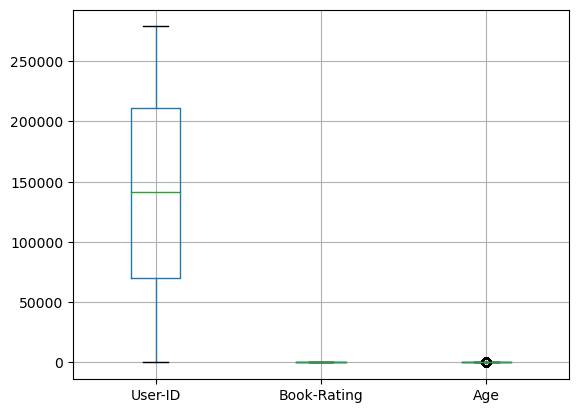

In [57]:
df.boxplot()

In [58]:
df['Age'].max()

244.0

In [59]:
df['Age'].min()

0.0

In [60]:
df[df['Age'] > 85]['Age'].count()

3304

In [61]:
df[df['Age'] < 8]['Age'].count()

2045

In [62]:
#Here Age column is only having outliers, we can handle them using Outlier detection function

#We can set the upper threshold as 85 and lower threshold as 8 for Age
lower_threshold = 8
upper_threshold =85
outliers= df[(df['Age'] < lower_threshold) | (df['Age'] > upper_threshold)]
print(outliers.shape)



(5349, 8)


In [63]:
print(outliers['Age'])

118537     116.0
118538     116.0
118539     116.0
118540     116.0
118541     116.0
           ...  
1030210    104.0
1030252      0.0
1030399     98.0
1030531    103.0
1030648    104.0
Name: Age, Length: 5349, dtype: float64


In [64]:
#Capping outliers
#We can assign the threshold values for all age above 85 and below 8
df['Age'] = df['Age'].apply(lambda x: lower_threshold if x < lower_threshold else (upper_threshold if x > upper_threshold else x))



In [65]:
df.shape

(1031132, 8)

## Data Visualization


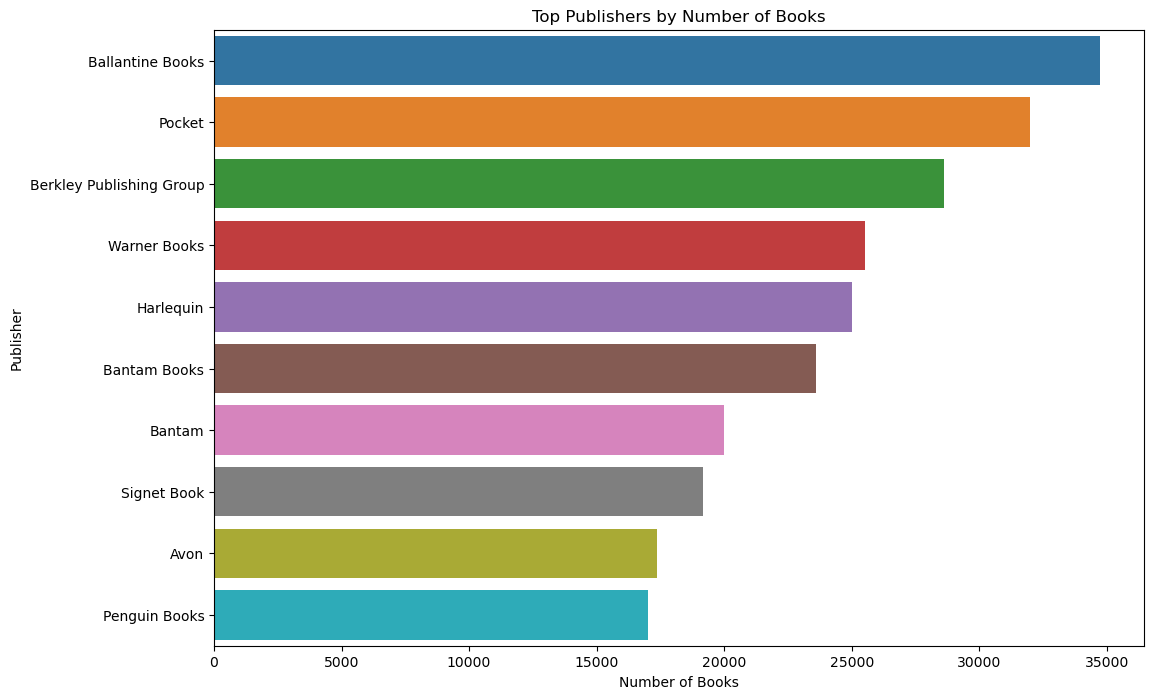

In [66]:
# Bar Plot for Top Publishers
plt.figure(figsize=(12, 8))
top_publishers = df['Publisher'].value_counts().head(10)  # Adjust to show top N publishers
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

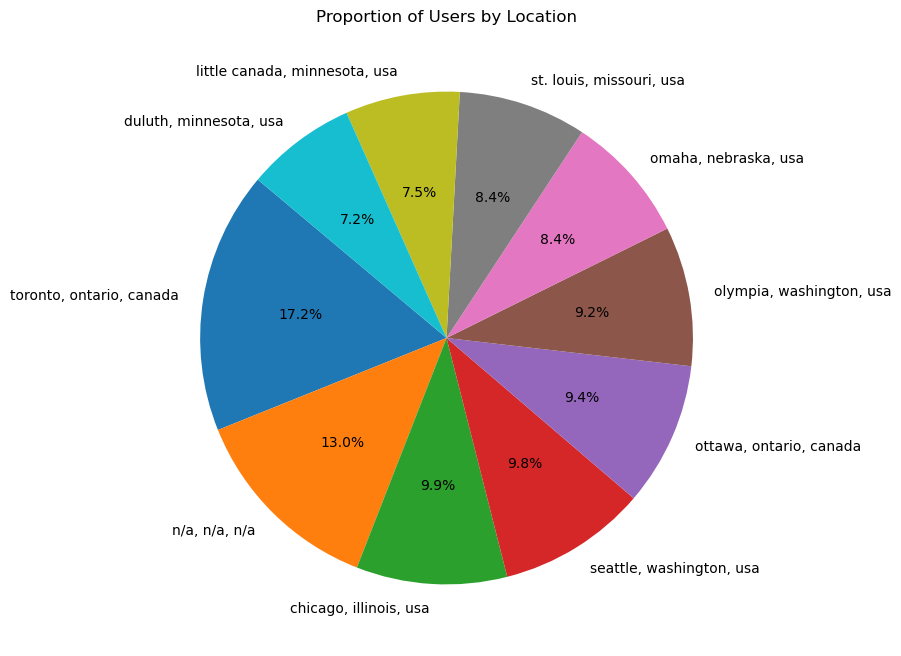

In [67]:
# Pie Chart for Location proportions
plt.figure(figsize=(12, 8))
location_counts = df['Location'].value_counts().head(10)  # Adjust the number to show top N locations
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Users by Location')
plt.show()

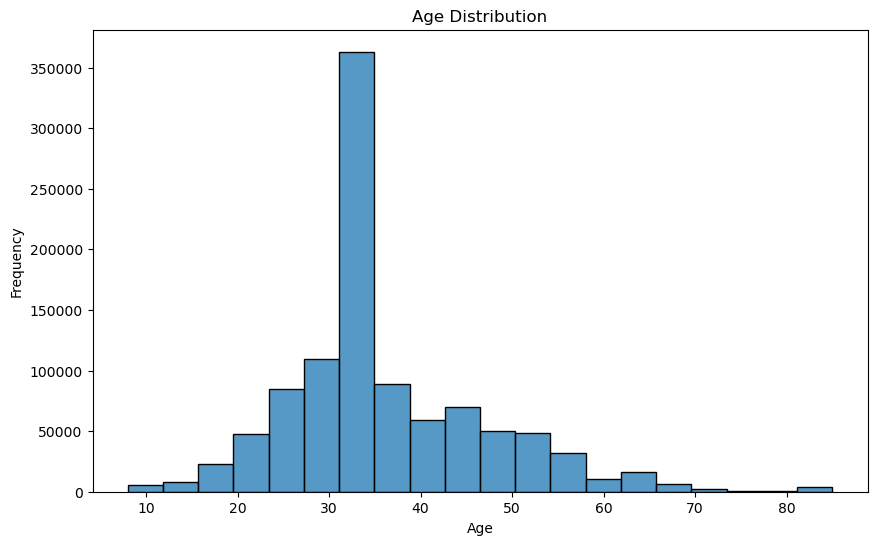

In [68]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

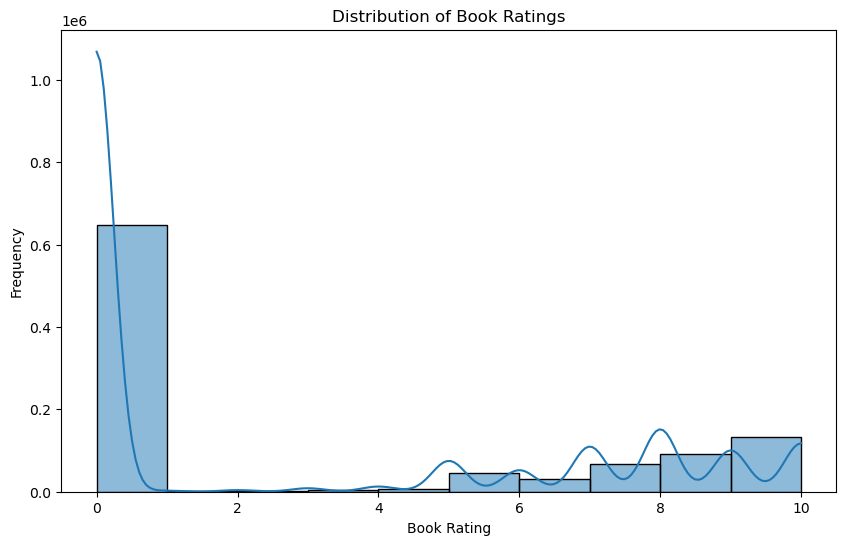

In [69]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

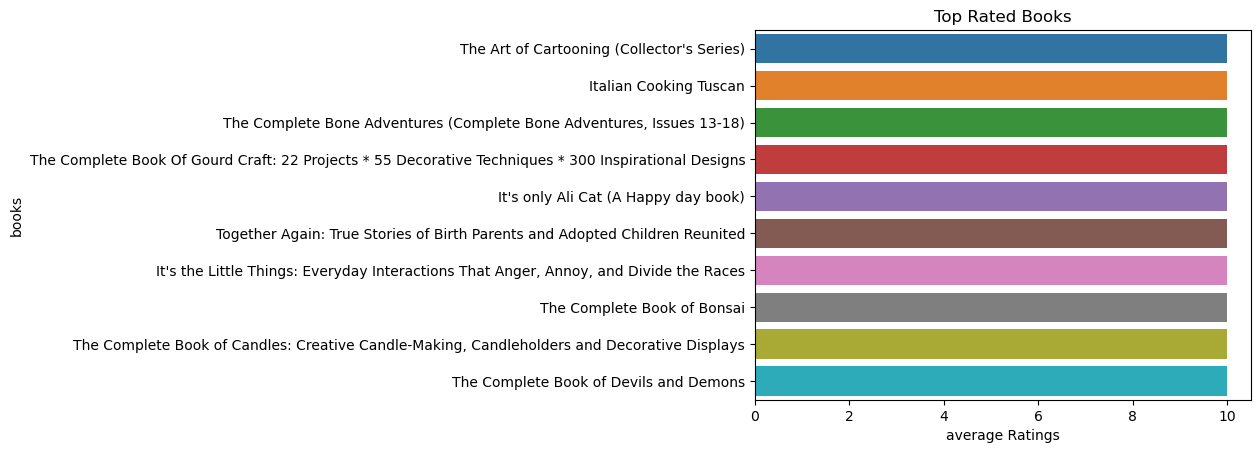

In [70]:
# Top 10 books with high average rating

top_rated_books = df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_rated_books.values, y=top_rated_books.index)
plt.title('Top Rated Books')
plt.xlabel('average Ratings')
plt.ylabel('books')
plt.show()


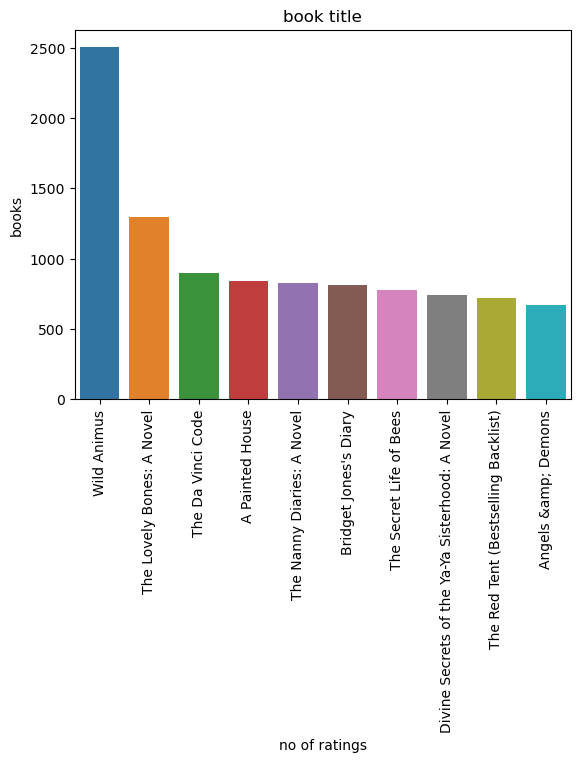

In [71]:
book_rating_counts = df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)
sns.barplot(x=book_rating_counts.index, y=book_rating_counts.values)
plt.title('book title')
plt.xlabel('no of ratings')
plt.xticks(rotation=90)
plt.ylabel('books')
plt.show()

##  Collaborative Filtering

In [72]:
# finding if any individual user have rated 200+ books
x = df.groupby('User-ID').count()['Book-Rating'] > 200
# storing their user id in new
new = x[x].index

In [73]:
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [74]:
new

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [75]:
# filtering the user data who have rarted 200+ books
filtered_rating = df[df['User-ID'].isin(new)]
filtered_rating

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
80,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",33.0
81,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",33.0
82,PLEADING GUILTY,Scott Turow,Audioworks,http://images.amazon.com/images/P/0671870432.0...,11676,8,"n/a, n/a, n/a",33.0
83,Nights Below Station Street,David Adams Richards,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,11676,0,"n/a, n/a, n/a",33.0
84,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",33.0
...,...,...,...,...,...,...,...,...
897052,Petticoats and Pistols (Topaz Historical Roman...,Margaret Brownley,Topaz,http://images.amazon.com/images/P/0451406184.0...,72352,0,"samieira, pontevedra, spain",49.0
897053,Savage Whispers (Savage),Cassie Edwards,Love Spell,http://images.amazon.com/images/P/0505521423.0...,72352,0,"samieira, pontevedra, spain",49.0
897054,Silver Wing (Topaz Historical Romance),Cassie Edwards,Topaz,http://images.amazon.com/images/P/0451408438.0...,72352,0,"samieira, pontevedra, spain",49.0
897055,Her Only Hero (Zebra Splendor Historical Roman...,Jo Ann Ferguson,Kensington Publishing Corporation,http://images.amazon.com/images/P/0821764667.0...,72352,8,"samieira, pontevedra, spain",49.0


In [76]:
# getting book titles if they have more no of book rating(>=50)
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [77]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [78]:
#filtering the book deatils with >=50 no of book ratings
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [79]:
final_ratings

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
81,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",33.0
84,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",33.0
85,Beloved (Plume Contemporary Fiction),Toni Morrison,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a",33.0
88,Wild Animus,Rich Shapero,Too Far,http://images.amazon.com/images/P/0971880107.0...,11676,6,"n/a, n/a, n/a",33.0
89,Airframe,Michael Crichton,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,11676,0,"n/a, n/a, n/a",33.0
...,...,...,...,...,...,...,...,...
822258,Back Roads,Tawni O'Dell,Viking Books,http://images.amazon.com/images/P/0670894184.0...,165232,5,"saint albans, west virginia, usa",23.0
822263,Rose Madder,Stephen King,Viking Books,http://images.amazon.com/images/P/0670858692.0...,165232,0,"saint albans, west virginia, usa",23.0
896868,Heartbreaker,Linda Howard,Mira,http://images.amazon.com/images/P/1551668874.0...,72352,0,"samieira, pontevedra, spain",49.0
896905,Guardian Angel,Julie Garwood,Pocket,http://images.amazon.com/images/P/0671670069.0...,72352,10,"samieira, pontevedra, spain",49.0


In [80]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [81]:
pt.fillna(0,inplace=True)

In [82]:
pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
from sklearn.metrics.pairwise import cosine_similarity


In [84]:
similarity_scores = cosine_similarity(pt)

In [85]:
similarity_scores.shape

(706, 706)

In [86]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        data.append(item)

    return data

In [87]:
recommend('1984')


[['Animal Farm', 'George Orwell'],
 ["The Handmaid's Tale", 'Margaret Atwood'],
 ['Brave New World', 'Aldous Huxley'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)', 'ANNE RICE']]

## Content Based filtering

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [89]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Book-Author'])

In [90]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [91]:
def recommend_books_knn(book_title, model_knn=model_knn, df=df, num_recommendations=5):

    idx = df[df['Book-Title'] == book_title].index[0]

    book_vector = tfidf_matrix[idx].reshape(1, -1)

    distances, indices = model_knn.kneighbors(book_vector, n_neighbors=num_recommendations+1)

    recommended_indices = indices.flatten()[1:]

    return df[['Book-Title', 'Book-Author','Image-URL-L']].iloc[recommended_indices]


sample_book_title = "Harry Potter and the Sorcerer's Stone (Book 1)"
recommended_books_knn = recommend_books_knn(sample_book_title)
print(recommended_books_knn)

                                               Book-Title    Book-Author  \
599681  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
698101       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
326329  Harry Potter and the Sorcerer's Stone (Harry P...  J. K. Rowling   
316280  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   
698100  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling   

                                              Image-URL-L  
599681  http://images.amazon.com/images/P/043935806X.0...  
698101  http://images.amazon.com/images/P/0439139600.0...  
326329  http://images.amazon.com/images/P/059035342X.0...  
316280  http://images.amazon.com/images/P/0439136350.0...  
698100  http://images.amazon.com/images/P/0439136369.0...  


## Popularity based

In [92]:
#merging books and ratings dataset
books_1=books.merge(ratings,on='ISBN')
books_1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [93]:
#grouping needed columns
books_1=books_1[['Book-Title','Book-Author','Book-Rating']]
books_1

,Book-Title,Book-Author,Book-Rating
0,Classical Mythology,Mark P. O. Morford,0
1,Clara Callan,Richard Bruce Wright,5
2,Clara Callan,Richard Bruce Wright,0
3,Clara Callan,Richard Bruce Wright,8
4,Clara Callan,Richard Bruce Wright,0
...,...,...,...
1031131,There's a Bat in Bunk Five,Paula Danziger,7
1031132,From One to One Hundred,Teri Sloat,4
1031133,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,0
1031134,Republic (World's Classics),Plato,0


In [94]:
num_of_ratings = books_1.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_of_ratings.rename(columns={'Book-Rating':'num_of_ratings'},inplace=True)
num_of_ratings

,Book-Title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [95]:
#checking the average ratings
average_ratings = books_1.groupby('Book-Title')['Book-Rating'].mean().reset_index()
average_ratings.rename(columns={'Book-Rating':'average_ratings'},inplace=True)
average_ratings

,Book-Title,average_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [96]:
#merging book rating and average rating count
popular_books=num_of_ratings.merge(average_ratings,on='Book-Title')
popular_books

,Book-Title,num_of_ratings,average_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [97]:
popular_books.merge(books_1,on='Book-Title')[['Book-Title','Book-Author','num_of_ratings','average_ratings']]

,Book-Title,Book-Author,num_of_ratings,average_ratings
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,4,2.250000
1,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,4,2.250000
2,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,4,2.250000
3,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,4,2.250000
4,Always Have Popsicles,Rebecca Harvin,1,0.000000
...,...,...,...,...
1031131,Ã?Â?stlich der Berge.,David Guterson,3,2.666667
1031132,Ã?Â?stlich der Berge.,David Guterson,3,2.666667
1031133,Ã?Â?stlich der Berge.,David Guterson,3,2.666667
1031134,Ã?Â?thique en toc,Didier Daeninckx,2,4.000000


In [98]:
popular_Books=popular_books[popular_books['num_of_ratings'] >=500].sort_values('average_ratings',ascending=False).head(20)

In [99]:
#showing the top 20 books which has rating more than 500
popular_Books

,Book-Title,num_of_ratings,average_ratings
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219741,To Kill a Mockingbird,510,4.700000
183573,The Da Vinci Code,898,4.642539
196326,The Lovely Bones: A Novel,1295,4.468726
206502,The Secret Life of Bees,774,4.447028
204387,The Red Tent (Bestselling Backlist),723,4.334716
74750,Girl with a Pearl Earring,526,4.218631
233370,Where the Heart Is (Oprah's Book Club (Paperba...,585,4.105983
107962,Life of Pi,664,4.088855


In [100]:
import pickle

# Save the recommendation function and necessary data
with open('recommendation_model.pkl', 'wb') as f:
    pickle.dump((recommend_books_knn, df, tfidf_matrix, model_knn), f)